# Main Data Processing For Steganography Project GBRAS-net Test

In [3]:
!pip3 install opencv-python;

In [5]:
!conda install matplotlib;

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Retrieving notices: ...working... done


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "../../data/"

CATEGORIES = ['Cover', 'UERD']


## Walk through of Processing

Using Example of the first cover image

In [12]:
path = os.path.join(DATADIR, 'Cover')
img = os.listdir(path)[0]
img_array = cv2.imread(os.path.join(path, img))

In [13]:
img_array.shape

(512, 512, 3)

### Original Image

This is the first image of the data set

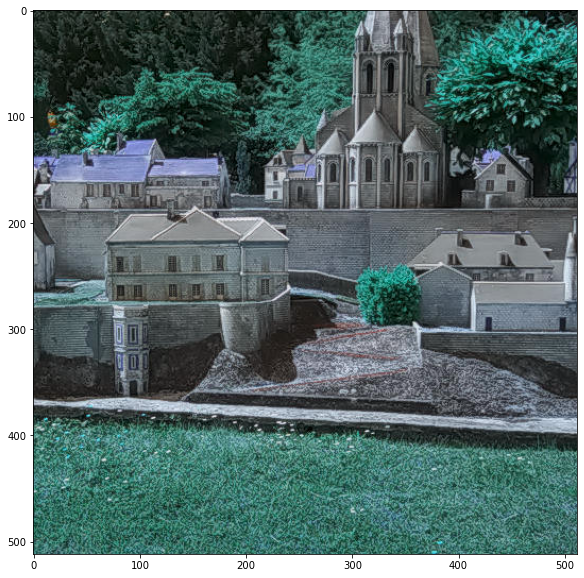

In [23]:


plt.figure(figsize=(10, 10))
plt.imshow(img_array)

### Greyscale

First gray scale the image to reduce the size of the image from (512, 512, 3) to (512, 512, 1)

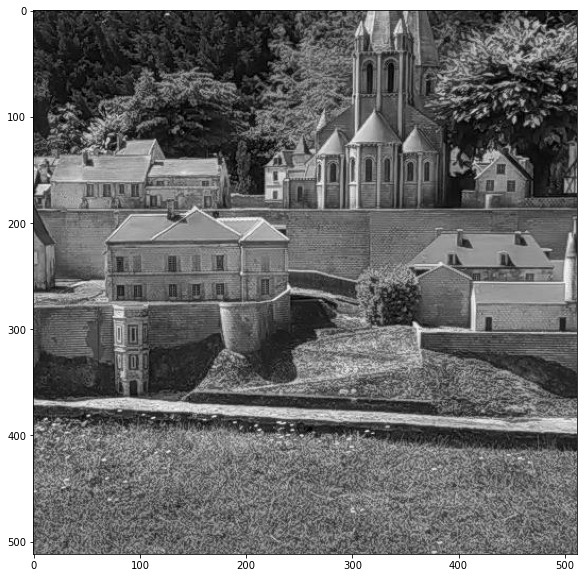

In [25]:
img_array_gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 10))
plt.imshow(img_array_gray, cmap='gray')

### Resize

Than resize image from (512, 512, 1) to (256, 256, 1)

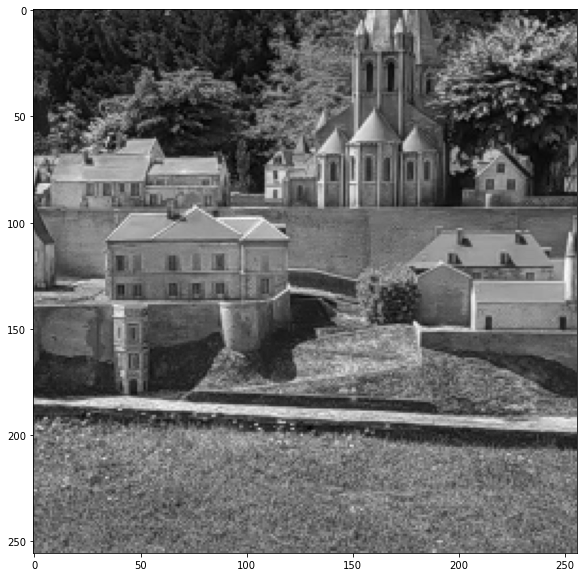

In [27]:
size = 256

img_array_gray_resize = cv2.resize(img_array_gray, (size, size))


plt.figure(figsize=(10, 10))
plt.imshow(img_array_gray_resize, cmap='gray')

In [11]:
import numpy as np

size = 256

X = []
y = []

def create_data(num_images = 5000):

    for c in CATEGORIES:
        path = os.path.join(DATADIR, c)
        class_num = CATEGORIES.index(c)

        for img in os.listdir(path)[:num_images]:
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (size, size))
                X.append(new_array)
                y.append(class_num)
            except Exception as e:
                pass

create_data(num_images = 5000)

In [12]:
X = np.array(X).reshape(-1, size, size, 1)

In [13]:
X[0].shape

(256, 256, 1)

In [14]:
import pickle

with open("X_256.pickle", 'wb') as pickle_out:
    pickle.dump(X, pickle_out)

with open("y_256.pickle", 'wb') as pickle_out:
    pickle.dump(y, pickle_out)